### Упражнение 1

* Реализуйте функцию `plot_horizontal_bar`, рисующую горизонтальные bar'ы

In [1]:
import matplotlib 
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd

from pandas.plotting import register_matplotlib_converters 
register_matplotlib_converters() 

import seaborn as sns
sns.set_style('white')
%config InlineBackend.figure_format = 'svg'

%matplotlib inline

In [6]:
# Сигнатура функции и пример вывода:

bars_length = np.random.randint(-10, 10, 10)
bars_length.sort()
ind = np.arange(len(bars_length))
yticks_labels = ['some label: {}'.format(i) for i in range(10)]
labels = ['some text: {}'.format(i) for i in range(10)]
figsize = (10, 8)


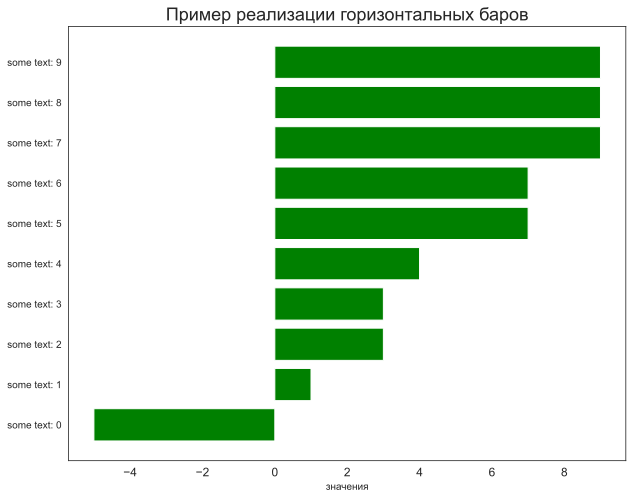

In [13]:
def plot_horizontal_bar(bars_length, labels, yticks_labels, figsize):
    plt.figure(figsize=figsize)
    plt.barh(yticks_labels, bars_length, align='center', color='green')
    plt.yticks(yticks_labels, labels, fontsize=10)
    plt.xticks(fontsize=12)
    plt.xlabel('значения', fontsize=10)
    plt.title('Пример реализации горизонтальных баров', fontsize=18)
    plt.show()
    
plot_horizontal_bar(bars_length, labels, yticks_labels, figsize)

### Упражнение 2

* Реализуйте функцию `plot_time_probabilities`, рисующую изменяющиеся во времени вероятности неких событий.
* Cобытия для нас имеют тональность (от плохого к хорошему). Отразите ее на графике с помощью градиента по цвету.

In [14]:
# Сигнатура функции и пример вывода:

dti = pd.date_range('2013-01-01', '2020-12-31', freq='2W')
probabilities_in_time = np.random.random((10, len(dti)))
probabilities_in_time = probabilities_in_time / probabilities_in_time.sum(axis=0)
probabilities_in_time = pd.DataFrame(probabilities_in_time).T
probabilities_in_time.index = dti
figsize = (20, 5)

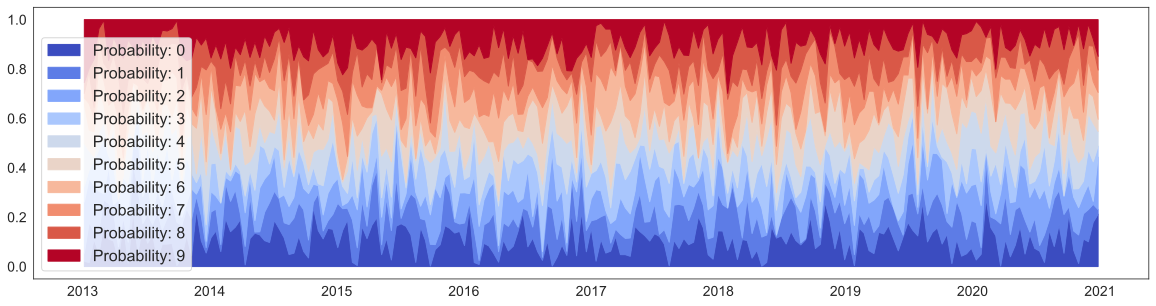

In [15]:
def plot_time_probabilities(probabilities_in_time, figsize):
    plt.figure(figsize=figsize)
    col=['#3b4cc0','#5d7ce6', '#82a6fb', '#aac7fd', '#cdd9ec', '#ead4c8', '#f7b89c', '#f18d6f', '#d95847', '#b40426']
    gr0 = 0 * probabilities_in_time[0]
    for i in probabilities_in_time.columns:
        plt.fill_between(probabilities_in_time.index, probabilities_in_time[i]+gr0, gr0, color=col[i],label=str('Probability: '+ str(i)))
        gr0 += probabilities_in_time[i]
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    plt.legend(loc='lower left' ,prop={'size': 16})
    plt.show()
    
plot_time_probabilities(probabilities_in_time, figsize)

### Упражнение 3
 
* Реализуйте функцию `plot_intraday_ts`, рисующую тепловую карту по временному ряду с внутридневными данными

In [21]:
# Сигнатура функции и пример вывода:

intraday_ts = pd.Series(np.random.randint(0, 100, 3625), 
                        index=pd.date_range('2020-02-01', '2020-07-01', freq='H'))
intraday_ts.loc[(intraday_ts.index.hour < 9) | (intraday_ts.index.hour > 18)] = np.nan
figsize = (15, 6)


In [57]:
df = pd.DataFrame({'время': intraday_ts.index, 'дата' : intraday_ts})
df['день'] = df['время'].dt.date
df['час'] = df['время'].dt.hour
df['час'] = df['час'].astype(int)
df['день'] = df['день'].astype(str)
maps=df.pivot_table(['дата'], index=['час'], columns='день')
df.head()

,время,дата,день,час
2020-02-01 00:00:00,2020-02-01 00:00:00,NaN,2020-02-01,0
2020-02-01 01:00:00,2020-02-01 01:00:00,NaN,2020-02-01,1
2020-02-01 02:00:00,2020-02-01 02:00:00,NaN,2020-02-01,2
2020-02-01 03:00:00,2020-02-01 03:00:00,NaN,2020-02-01,3
2020-02-01 04:00:00,2020-02-01 04:00:00,NaN,2020-02-01,4


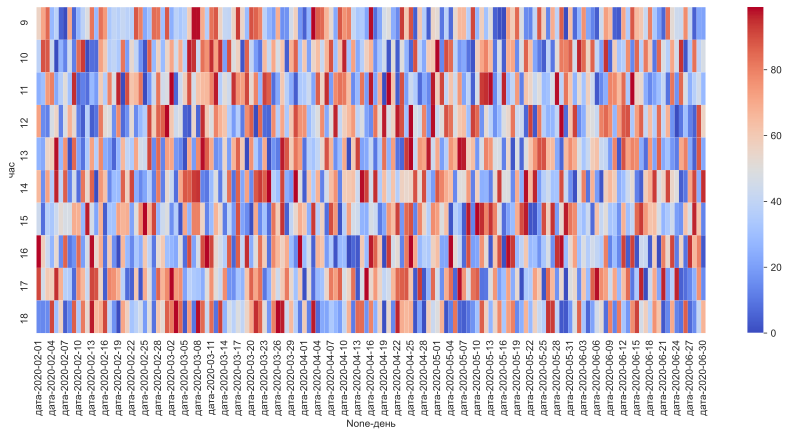

In [54]:
def plot_intraday_ts(intraday_ts, figsize):
    df = pd.DataFrame({'время': intraday_ts.index, 'дата' : intraday_ts})
    df['день'] = df['время'].dt.date
    df['час'] = df['время'].dt.hour
    df['час'] = df['час'].astype(int)
    df['день'] = df['день'].astype(str)
    maps=df.pivot_table(['дата'], index=['час'],columns='день')
    
    pfig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(maps, cmap='coolwarm')

plot_intraday_ts(intraday_ts, figsize)